In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from tqdm import tqdm

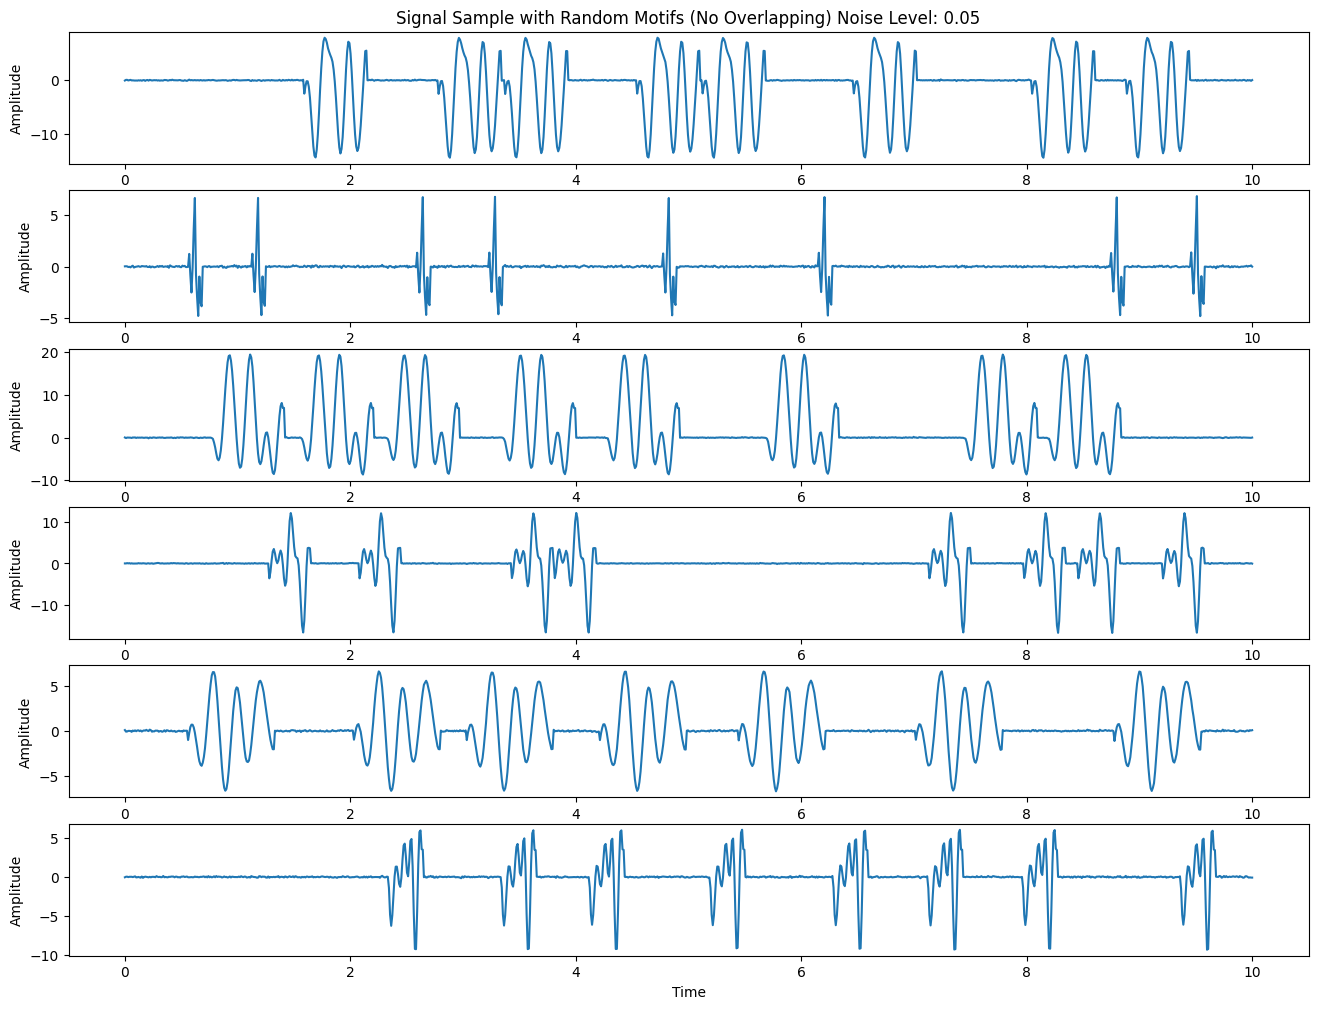

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Parameters
n_samples = 1000  # Number of data points in the signal
n_signals = 1000     # Number of signal samples to generate
t = np.linspace(0, 10, n_samples)  # Time vector
max_motif_length = 100  # Maximum length of the motif
n_motifs = 10  # Number of motifs to generate
noise_level = 0.05  # Noise level for motifs and signals

def generate_random_motif(min_motif_length, max_motif_length, min_sinusoids, max_sinusoids=100, noise_level=0.05):
    """Create a motif as a combination of multiple sinusoids with random frequencies and amplitudes."""
    motif_length = np.random.randint(min_motif_length, max_motif_length)  # Randomly select motif length
    motif = np.zeros(motif_length)
    
    # Randomly select the number of sinusoids
    n_sinusoids = np.random.randint(min_sinusoids, max_sinusoids + 1)
    
    # Time vector for the motif
    t_motif = np.linspace(0, 1, motif_length)
    
    # Add multiple sinusoids with random frequencies, amplitudes, and phases
    for _ in range(n_sinusoids):
        freq = np.random.uniform(0.5, 5)  # Random frequency between 0.5 and 5 Hz
        amplitude = np.random.uniform(0.5, 2)  # Random amplitude between 0.5 and 2
        phase = np.random.uniform(0, 2 * np.pi)  # Random phase
        motif += amplitude * np.sin(2 * np.pi * freq * t_motif + phase)
    
    # Add random noise
    # motif += noise_level * np.random.randn(motif_length)
    
    return motif

def warp_motif(motif, warp_factor):
    """Warp the motif by stretching or compressing it in time."""
    warped_motif_length = int(len(motif) * warp_factor)
    warped_motif = np.interp(np.linspace(0, len(motif), warped_motif_length), np.arange(len(motif)), motif)
    return warped_motif

# def place_motifs_randomly_no_overlap(t, n_samples, motifs, n_motifs, noise_level=0.05):
#     """Place motifs randomly in the signal ensuring no overlap."""
#     signal = np.zeros_like(t)
    
#     occupied = np.zeros(n_samples)  # Array to track occupied spaces (1 means occupied, 0 means free)

#     for i in range(5):
#         # randomly select a motif
#         motif_idx = np.random.randint(0, len(motifs))
#         motif = motifs[motif_idx]
        
#         # Warp the motif randomly (stretch or compress)
#         warp_factor = np.random.uniform(0.5, 1.5)  # Warp factor between 0.5 (compress) and 1.5 (stretch)
#         warped_motif = warp_motif(motif, warp_factor)
        
#         # Find possible starting positions where the motif can fit without overlap
#         possible_starts = np.where(np.convolve(occupied, np.ones(len(warped_motif)+20), mode='valid') == 0)[0]
        
#         if len(possible_starts) == 0:
#             # If no space is left, skip placing the motif
#             break
        
#         # Randomly choose one of the available starting positions
#         start_idx = np.random.choice(possible_starts)
        
#         # Place the motif in the signal
#         signal[start_idx:start_idx + len(warped_motif)] = warped_motif
        
#         # Mark the space as occupied
#         occupied[start_idx:start_idx + len(warped_motif)] = 1
    
#     # Add some global noise across the signal
#     signal += noise_level * np.random.randn(n_samples)
    
#     return signal

def place_motifs_randomly_no_overlap(t, n_samples, motifs, n_motifs, noise_level=0.05,idx =0):
    """Place motifs randomly in the signal ensuring no overlap."""
    signal = np.zeros_like(t)
    
    occupied = np.zeros(n_samples)  # Array to track occupied spaces (1 means occupied, 0 means free)

    for i in range(8):
        # randomly select a motif
        # motif_idx = np.random.randint(0, len(motifs))
        motif_idx = idx%n_motifs
        motif = motifs[motif_idx]
        
        # Warp the motif randomly (stretch or compress)
        # warp_factor = np.random.uniform(0.5, 1.5)  # Warp factor between 0.5 (compress) and 1.5 (stretch)
        warped_motif = warp_motif(motif, warp_factor=1)
        
        # Find possible starting positions where the motif can fit without overlap
        possible_starts = np.where(np.convolve(occupied, np.ones(len(warped_motif)+30), mode='valid') == 0)[0]
        
        if len(possible_starts) == 0:
            # If no space is left, skip placing the motif
            break
        
        # Randomly choose one of the available starting positions
        start_idx = np.random.choice(possible_starts)
        
        # Place the motif in the signal
        signal[start_idx:start_idx + len(warped_motif)] = warped_motif
        
        # Mark the space as occupied
        occupied[start_idx:start_idx + len(warped_motif)] = 1
    
    # Add some global noise across the signal
    signal += noise_level * np.random.randn(n_samples)
    
    return signal

# Generate a fixed set of motifs with random lengths
min_motif_length = max_motif_length // 20
motifs = [generate_random_motif(min_motif_length, max_motif_length, noise_level) for _ in range(n_motifs)]

# Generate multiple signal samples with fixed motifs placed randomly without overlap
# signals = [place_motifs_randomly_no_overlap(t, n_samples, motifs, n_motifs) for _ in range(n_signals)]
signals = [place_motifs_randomly_no_overlap(t, n_samples, motifs, n_motifs,0.05,i) for i in range(n_signals)]

# Plot the generated signals
plt.figure(figsize=(16, 12))
for i, signal in enumerate(signals):
    plt.subplot(6, 1, i + 1)
    plt.plot(t, signal, label=f"Signal Sample {i + 1}")
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    if i == 0:
        plt.title(f'Signal Sample with Random Motifs (No Overlapping) Noise Level: {noise_level}')

    # plt.grid(True)

    # plt.legend()
    if i ==5:
        break

# plt.tight_layout()
plt.show()


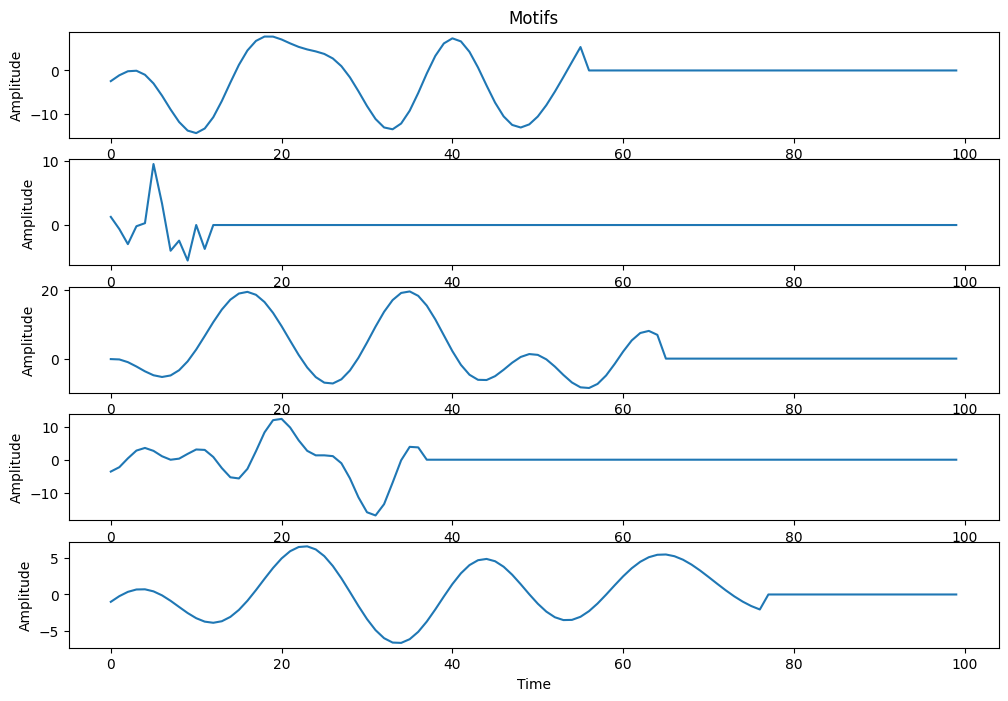

In [3]:
# plot the motifs
plt.figure(figsize=(12, 8))
# fix the length of x axis


for i, motif in enumerate(motifs):
    plt.subplot(5, 1, i + 1)
    # pad the motif to the maxmotif length
    motif = np.pad(motif, (0, max_motif_length - len(motif)))
    
    
    
    plt.plot(motif, label=f"Motif {i + 1}")
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    # plt.grid(True)
    # plt.legend()
    if i==0:
        plt.title(f'Motifs')
    if i ==4:
        break

In [4]:
# save the signals and motifs
padded_motifs = []
for i, motif in enumerate(motifs):
    motif = np.pad(motif, (0, max_motif_length - len(motif)))
    padded_motifs.append(motif)



np.save('./synthetic_signals/signals_simple.npy',np.array(signals))
np.save('./synthetic_signals/motifs_simple.npy',np.array(padded_motifs))

# np.save('/home/jp65/Biosignals_Research/synthetic_experiments/signals.npy',np.array(signals))
# np.save('/home/jp65/Biosignals_Research/synthetic_experiments/motifs.npy',np.array(padded_motifs))

# Testing BPE 

In [5]:
from models.models import Autoencoder

device = "cuda:3"
AEmodel = Autoencoder(
            num_channels=1,
            emb_size = 64, 
            patch_size = 20, # 0.2s window as patch size
            model_type = "Linear",
            sparsity = 0.5,
        ).to(device)



In [6]:
# read the signals and motifs
synthetic_signal_data = np.load('./synthetic_signals/signals_simple.npy')
synthetic_motifs = np.load('./synthetic_signals/motifs_simple.npy')


In [7]:
from torch.utils.data import DataLoader, Dataset

class SyntheticDataset_AE(Dataset):
    def __init__(self, data):
        self.data = data
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return torch.tensor(self.data[idx])
    
synthetic_dataset_AE = SyntheticDataset_AE(synthetic_signal_data)
synthetic_dataloader_AE = DataLoader(synthetic_dataset_AE, batch_size=32, shuffle=False)


/home/jp65/miniconda3/envs/FM_bio/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 100/100 [00:05<00:00, 18.17it/s]


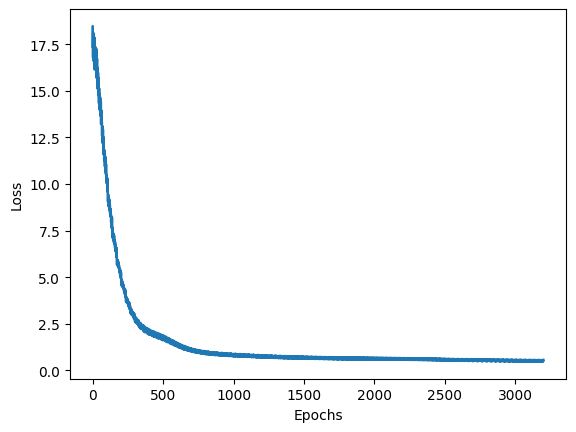

In [8]:


optimizer = torch.optim.Adam(AEmodel.parameters(), lr=0.001)
loss_list = []
# train the AE model on the synthetic data
for i in tqdm(range(100)):
    for x in synthetic_dataloader_AE:
        
        # x = torch.tensor(x).unsqueeze(0).unsqueeze(0).float().to(device)
        x = x.unsqueeze(1).float().to(device)
        # print(x.shape)
        patch_size = 20
        x = x.unfold(2,patch_size,patch_size).permute(0,2,1,3) # (batch, time//patch_size, channels, patch_size)
        x = x.reshape(-1,x.shape[2],x.shape[3])
        
        optimizer.zero_grad()
        x_recon, z = AEmodel(x)
        loss = AEmodel.recon_loss(x,x_recon) + AEmodel.sparse_loss(z)
        
        loss.backward()
        optimizer.step()
        loss_list.append(loss.item())

# save the model
# torch.save(AEmodel,'/home/jp65/Biosignals_Research/synthetic_experiments/AEmodel.pth')
torch.save(AEmodel,'./synthetic_signals/AEmodel_simple.pth')

plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
        

        


In [9]:
# load the model
AEmodel = torch.load('./synthetic_signals/AEmodel_simple.pth').eval().to(device)

In [10]:
# clustering
from sklearn.cluster import KMeans

x_token_list = []
x_list = []
for x in synthetic_signal_data:
    x = torch.tensor(x).unsqueeze(0).unsqueeze(0).float().to(device)
    patch_size = 20
    x = x.unfold(2,patch_size,patch_size).permute(0,2,1,3) # (batch, time//patch_size, channels, patch_size)
    x = x.reshape(-1,x.shape[2],x.shape[3])
    x_token_list.append(AEmodel.tokenize(x).squeeze().detach().cpu().numpy())
    x_list.append(x.squeeze().detach().cpu().numpy())
    
x_token_list = np.concatenate(x_token_list,axis=0)
x_list = np.concatenate(x_list,axis=0)

print(x_token_list.shape,x_list.shape)

(50000, 64) (50000, 20)


In [11]:
num_clusters = 50
km = KMeans(n_clusters=20, random_state=5)
km.fit(x_token_list)

cluster_centers = km.cluster_centers_
print(cluster_centers.shape)
# np.save('/home/jp65/Biosignals_Research/synthetic_experiments/cluster_centers.npy',cluster_centers)
np.save('./synthetic_signals/cluster_centers_simple.npy',cluster_centers)

(20, 64)


In [12]:
# load the cluster centers
cluster_centers = np.load('./synthetic_signals/cluster_centers_simple.npy')

In [13]:
# decode the cluster centers and plot the motifs
decoded_motifs = []

# find the closest x_token to the cluster center and append the corresponding x to the decoded motifs
for cluster_center in cluster_centers:
    cluster_center = torch.tensor(cluster_center).unsqueeze(0).float().to(device)
    cluster_center = cluster_center.repeat(x_token_list.shape[0],1)

    
    distances = torch.cdist(cluster_center,torch.tensor(x_token_list).float().to(device))
    closest_idx = torch.argmin(distances)
    decoded_motifs.append(x_list[closest_idx])
    


    
decoded_motifs = np.array(decoded_motifs)
print(decoded_motifs.shape)

(20, 20)


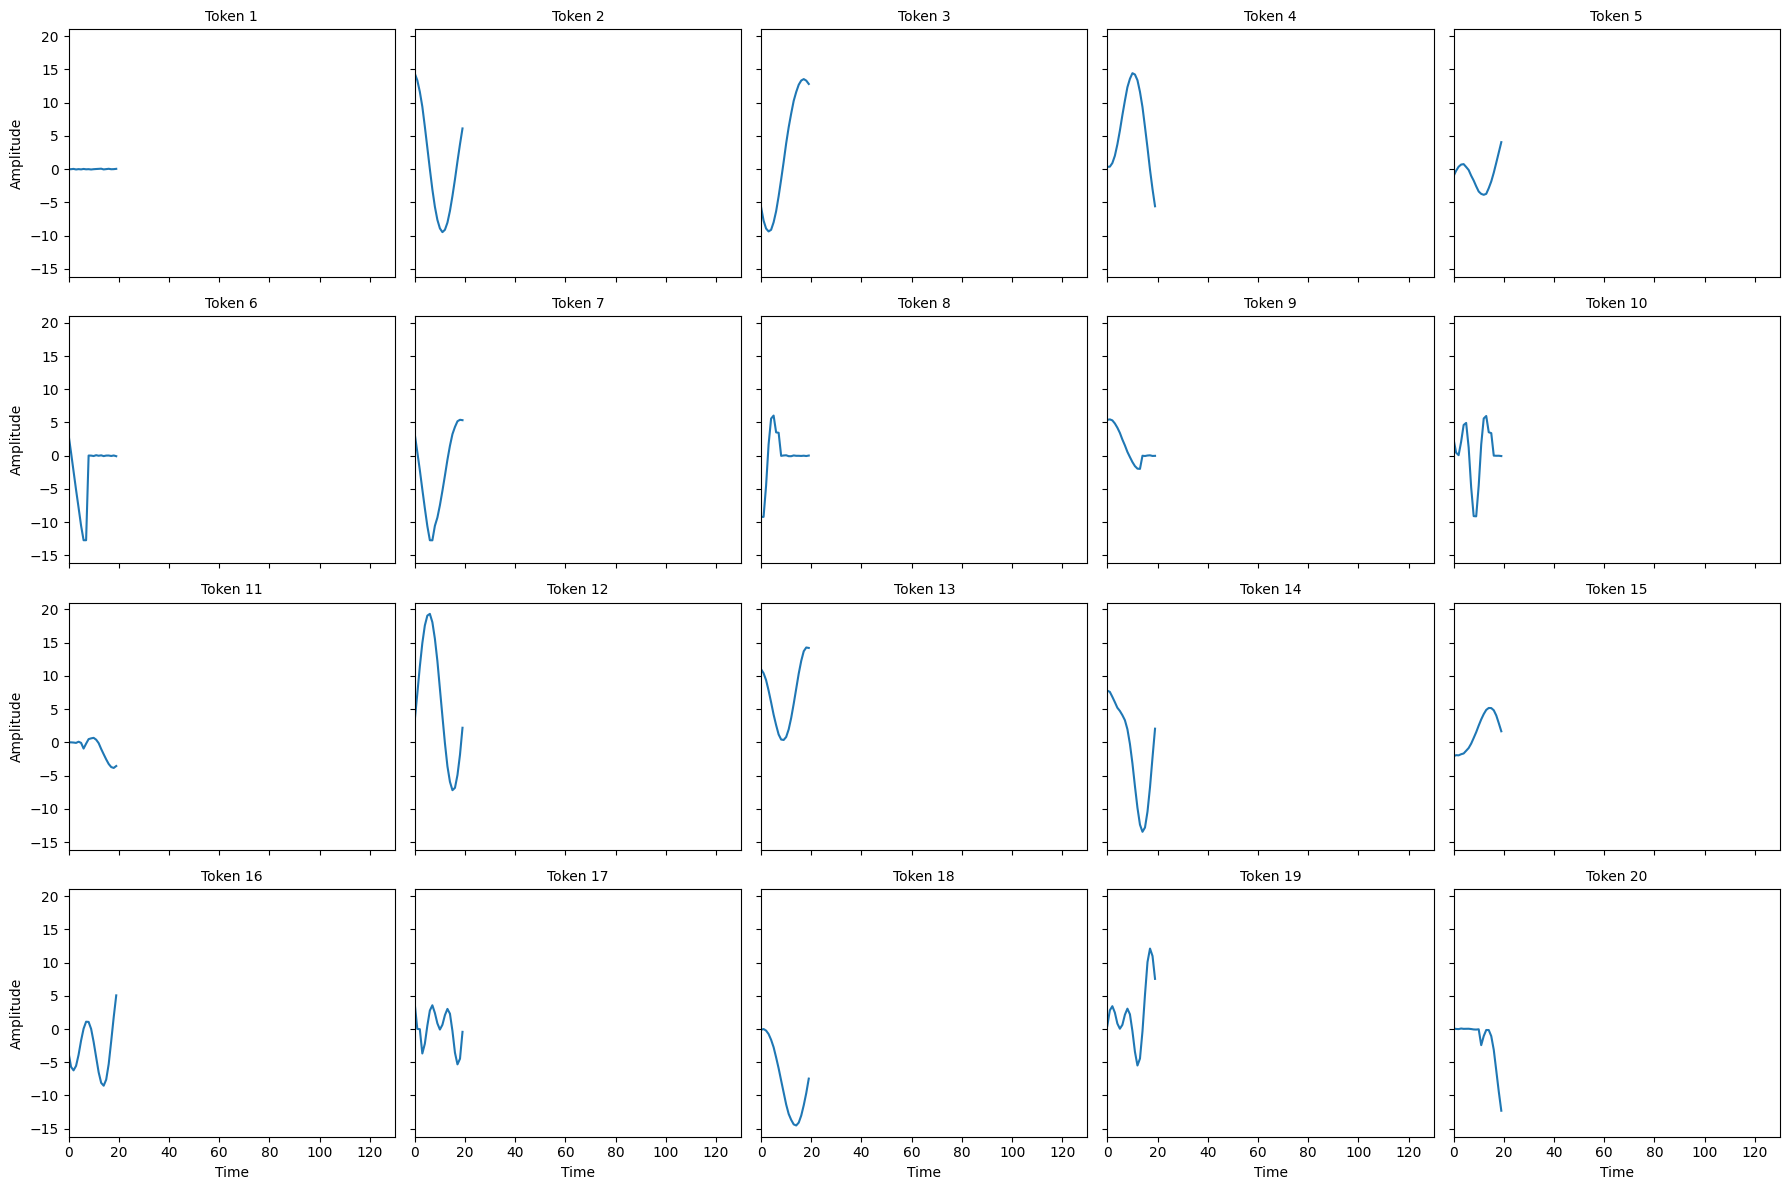

In [14]:

# Define number of subplots
n_plots = len(decoded_motifs)
n_cols = 5  # Fixed number of columns
n_rows = (n_plots + n_cols - 1) // n_cols  # Dynamically determine the number of rows

# Set up the figure with dynamic rows and columns
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 3), sharex=True, sharey=True)

# Flatten the axs array for easy iteration
axs = axs.ravel()

# Plot each motif after normalizing
for i, motif in enumerate(decoded_motifs):
    
   
    # Plot the normalized motif
    axs[i].plot(motif)
    
    # Set title for each subplot
    axs[i].set_title(f"Token {i + 1}", fontsize=10)
    axs[i].set_xlim(0, 130)
    
    # Optionally add labels to certain plots (first column and last row)
    if i % n_cols == 0:
        axs[i].set_ylabel("Amplitude")
    if i >= n_plots - n_cols:
        axs[i].set_xlabel("Time")

# Remove unused subplots if any
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Save and show the plot
plt.savefig('./synthetic_signals/decoded_motifs_simple.png')
plt.show()

# Save the decoded motifs
np.save('./synthetic_signals/decoded_motifs_simple.npy', decoded_motifs)


In [15]:
# create a dataloader for the synthetic data
from torch.utils.data import DataLoader, Dataset

class SyntheticDataset(Dataset):
    def __init__(self, data):
        self.data = data
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        x = torch.tensor(self.data[idx]).unsqueeze(0).unsqueeze(0).float()#.to(device)
        patch_size = 20
        x = x.unfold(2,patch_size,patch_size).permute(0,2,1,3).squeeze()#.unsqueeze(0) # (batch, time//patch_size, channels, patch_size)
       
        
        return x, 1
    
synthetic_dataset = SyntheticDataset(synthetic_signal_data)
synthetic_dataloader = DataLoader(synthetic_dataset, batch_size=32, shuffle=False)


In [16]:
from unittest import result
from utils.bpe import build_bpe_trie,assign_to_nearest_cluster_batch#, convert_to_bpe, 
from collections import defaultdict
from concurrent.futures import ProcessPoolExecutor



def convert_token_list_to_bpe(token_list, bpe_trie, seq_len, max_bpe, is_inference,compress_noise = False,compress_token = None):
    # Preprocess BPE vocab into a trie for efficient matching
    # bpe_trie = build_bpe_trie(bpe_vocab)
    converted_tokens = token_list.copy()
    # n = len(converted_tokens)
    n = len(converted_tokens)
    if compress_noise:
        # compress continuos '0' tokens to a single '0' token
        compressed_tokens = []
        compressed_tokens.append(converted_tokens[0])
        for i in range(1,n):
            if int(converted_tokens[i]) == compress_token and int(converted_tokens[i-1]) == compress_token:
                continue
            compressed_tokens.append(converted_tokens[i])
        converted_tokens = compressed_tokens
    n = len(converted_tokens)
    result_tokens = []
    idx = 0
    if n ==1:
        result_tokens.append(converted_tokens[0])
    while idx < n:
        node = bpe_trie
        match_len = 0
        matched_token = None

        # Try to find the longest match in the trie
        for i in range(idx, n):
            token = str(converted_tokens[i])  # Ensure we treat tokens as strings
            if token in node.children:
                node = node.children[token]
                if node.token is not None:
                    match_len = i - idx + 1
                    matched_token = node.token
            else:
                break
        
        if matched_token is not None:
            # If a match is found, use the BPE token
            result_tokens.append(matched_token)
            idx += match_len  # Skip over the matched sequence
        else:
            # No match, add the original token
            result_tokens.append(converted_tokens[idx])
            idx += 1

    # Handle inference padding
    if is_inference:
        result_len = len(result_tokens)
        if result_len < seq_len:
            padding = np.full(seq_len - result_len, int(max_bpe) + 1, dtype=int)
            result_tokens = np.concatenate((np.array(result_tokens, dtype=int), padding))
        result_tokens = np.array(result_tokens, dtype=int)

    return np.array(result_tokens)

def convert_to_bpe(nearest_tokens, bpe_vocab,bpe_trie, is_inference=False, num_processes=4,compress_noise = False):
    converted_tokens_list = []
    seq_len = len(nearest_tokens[0])
    try:
        max_bpe = max(bpe_vocab.keys())
    except ValueError:
        max_bpe = -1

    with ProcessPoolExecutor(max_workers=num_processes) as executor:
        futures = [executor.submit(convert_token_list_to_bpe, token_list, bpe_trie, seq_len, max_bpe, is_inference,compress_noise)
                   for token_list in nearest_tokens]

        for future in futures:
            converted_tokens_list.append(future.result())

    if is_inference:
        converted_tokens_list = np.array(converted_tokens_list)

    return converted_tokens_list



def get_most_freq_pair(val_loader,bpe_vocab,tokenizer_model,cluster_centers,device,compress_noise = False):
    stats = defaultdict(int)
    bpe_trie = build_bpe_trie(bpe_vocab)
    for i, val_batch in tqdm(enumerate(val_loader)):
        X, labels = val_batch
        # print(X.shape)
        x_token = tokenizer_model.tokenize(X.to(device)).permute(0,2,1)#.squeeze()
        # print(x_token.shape)
        nearest_tokens = assign_to_nearest_cluster_batch(x_token, cluster_centers)
        
        nearest_tokens = np.array(nearest_tokens).astype(int)
        
        
        
        # convert the combinations of tokens if tokens exists in the bpe_vocab
        bpe_converted_tokens = convert_to_bpe(nearest_tokens,bpe_vocab,bpe_trie,compress_noise=compress_noise)
        # print(len(bpe_converted_tokens))
        for sample in bpe_converted_tokens:
            # print(len(sample))
            if len(sample) == 1:
                continue
            for token_num in range(len(sample)-1):
                stats[f'{sample[token_num]} {sample[token_num+1]}'] += 1
    
    # sort the stats
    
    most_freq_pair, most_freq_pair_count = max(stats.items(), key=lambda x: x[1])
    
    return most_freq_pair,most_freq_pair_count

In [17]:
bpe_vocab ={}
cluster_centers = torch.tensor(cluster_centers).to(device)
most_freq_pair,most_freq_pair_count = get_most_freq_pair(synthetic_dataloader,bpe_vocab,AEmodel,cluster_centers,device,compress_noise = True)
print(most_freq_pair,most_freq_pair_count)

# assume the most frequent first pair is noise
# 0 0 19391 (so 0 0 is the noise token)
# assign 0 token as noise compress them first to one token, then apply BPE

0it [00:00, ?it/s]

32it [00:05,  6.20it/s]

0 0 18939


In [18]:
def learn_bpe(val_loader,bpe_vocab,max_vocab_size,tokenizer_model,cluster_centers,device,compress_noise = False):
    cluster_centers = torch.tensor(cluster_centers).to(device).float()
    most_freq_pair,most_freq_pair_count = get_most_freq_pair(val_loader,bpe_vocab,tokenizer_model,cluster_centers,device,compress_noise=compress_noise)
    # add the most frequent pair to the bpe_vocab
    bpe_vocab[cluster_centers.shape[0]] = most_freq_pair
    print(f'Added {most_freq_pair} to bpe_vocab')
    print(f'Most frequent pair count: {most_freq_pair_count}')
    print(f'Current vocab size: {len(bpe_vocab)}')
    # print(bpe_vocab)
    while max(bpe_vocab.keys()) < max_vocab_size-1:
        bpe_vocab = {k: v for k, v in sorted(bpe_vocab.items(), key=lambda item: len(item[1]), reverse=True)}
        most_freq_pair,most_freq_pair_count = get_most_freq_pair(val_loader,bpe_vocab,tokenizer_model,cluster_centers,device,compress_noise=compress_noise)
        # print (most_freq_pair_count,most_freq_pair)
        if most_freq_pair_count < 2:
            print('Most frequent pair count is less than 2, breaking loop')
            print(f'Final BPE vocab size: {len(bpe_vocab) + cluster_centers.shape[0]}')
            break
        
        # check if any token in the most frequent pair is already in the bpe_vocab
        most_freq_pair_list = np.array(most_freq_pair.split(' ')).astype(int)
        # print(most_freq_pair_list)
        i = 0
        while i < len(most_freq_pair_list):
            if most_freq_pair_list[i] in bpe_vocab:
                # print(most_freq_pair_list)
                exist_bpe_token_vals = bpe_vocab[int(most_freq_pair_list[i])]
                exist_bpe_token_vals = [int(i) for i in exist_bpe_token_vals.split(' ')]
                # split and convert to int most_freq_pair_list[i]
                
                most_freq_pair_list = np.delete(most_freq_pair_list, i)
                most_freq_pair_list = np.insert(most_freq_pair_list, i, exist_bpe_token_vals)
                # print(most_freq_pair_list)
            else:
                i += 1
        most_freq_pair = ' '.join(most_freq_pair_list.astype(str))
        
        
        # add the most frequent pair to the bpe_vocab
        bpe_vocab[max(bpe_vocab.keys())+1] = most_freq_pair
        print(f'Added {most_freq_pair} to bpe_vocab')
        print(f'Most frequent pair count: {most_freq_pair_count}')
        print(f'Current vocab size: {len(bpe_vocab)}')
    return bpe_vocab

In [19]:
# learn bpe using these
# from utils.bpe import learn_bpe

bpe_vocab = {}
learned_bpe_vocab = learn_bpe(synthetic_dataloader, bpe_vocab, 100, AEmodel, cluster_centers, device,compress_noise=True)



/tmp/ipykernel_101968/1706867847.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cluster_centers = torch.tensor(cluster_centers).to(device).float()
32it [00:05,  5.99it/s]


Added 0 0 to bpe_vocab
Most frequent pair count: 18939
Current vocab size: 1


32it [00:05,  6.18it/s]


Added 0 0 0 0 to bpe_vocab
Most frequent pair count: 5351
Current vocab size: 2


32it [00:05,  6.24it/s]


Added 0 0 0 to bpe_vocab
Most frequent pair count: 1566
Current vocab size: 3


32it [00:05,  6.19it/s]


Added 0 0 0 0 0 to bpe_vocab
Most frequent pair count: 861
Current vocab size: 4


32it [00:05,  6.39it/s]


Added 10 10 to bpe_vocab
Most frequent pair count: 805
Current vocab size: 5


32it [00:05,  6.39it/s]


Added 14 14 to bpe_vocab
Most frequent pair count: 565
Current vocab size: 6


32it [00:05,  5.97it/s]


Added 8 8 to bpe_vocab
Most frequent pair count: 466
Current vocab size: 7


32it [00:05,  5.96it/s]


Added 0 0 0 0 0 0 to bpe_vocab
Most frequent pair count: 449
Current vocab size: 8


32it [00:05,  6.22it/s]


Added 8 0 to bpe_vocab
Most frequent pair count: 396
Current vocab size: 9


32it [00:05,  5.89it/s]


Added 0 10 to bpe_vocab
Most frequent pair count: 360
Current vocab size: 10


32it [00:05,  5.87it/s]


Added 3 3 to bpe_vocab
Most frequent pair count: 337
Current vocab size: 11


32it [00:05,  6.06it/s]


Added 0 0 10 to bpe_vocab
Most frequent pair count: 295
Current vocab size: 12


32it [00:05,  6.04it/s]


Added 19 7 to bpe_vocab
Most frequent pair count: 290
Current vocab size: 13


32it [00:05,  5.96it/s]


Added 12 1 to bpe_vocab
Most frequent pair count: 275
Current vocab size: 14


32it [00:05,  5.96it/s]


Added 14 6 to bpe_vocab
Most frequent pair count: 265
Current vocab size: 15


32it [00:05,  5.87it/s]


Added 16 8 0 to bpe_vocab
Most frequent pair count: 255
Current vocab size: 16


32it [00:05,  6.06it/s]


Added 0 0 0 10 to bpe_vocab
Most frequent pair count: 240
Current vocab size: 17


32it [00:05,  5.92it/s]


Added 9 5 to bpe_vocab
Most frequent pair count: 239
Current vocab size: 18


32it [00:05,  5.90it/s]


Added 11 11 to bpe_vocab
Most frequent pair count: 227
Current vocab size: 19


32it [00:05,  5.74it/s]


Added 0 0 0 0 0 0 0 to bpe_vocab
Most frequent pair count: 222
Current vocab size: 20


32it [00:05,  5.77it/s]


Added 5 7 to bpe_vocab
Most frequent pair count: 213
Current vocab size: 21


32it [00:05,  5.79it/s]


Added 19 4 to bpe_vocab
Most frequent pair count: 209
Current vocab size: 22


32it [00:05,  5.84it/s]


Added 14 14 14 to bpe_vocab
Most frequent pair count: 205
Current vocab size: 23


32it [00:05,  5.69it/s]


Added 10 14 to bpe_vocab
Most frequent pair count: 196
Current vocab size: 24


32it [00:05,  5.82it/s]


Added 0 0 4 to bpe_vocab
Most frequent pair count: 185
Current vocab size: 25


32it [00:05,  5.98it/s]


Added 3 3 2 to bpe_vocab
Most frequent pair count: 178
Current vocab size: 26


32it [00:05,  6.16it/s]


Added 8 0 0 to bpe_vocab
Most frequent pair count: 177
Current vocab size: 27


32it [00:05,  6.11it/s]


Added 19 2 to bpe_vocab
Most frequent pair count: 174
Current vocab size: 28


32it [00:05,  6.03it/s]


Added 0 4 to bpe_vocab
Most frequent pair count: 165
Current vocab size: 29


32it [00:05,  5.75it/s]


Added 12 1 11 to bpe_vocab
Most frequent pair count: 147
Current vocab size: 30


32it [00:05,  6.00it/s]


Added 12 12 to bpe_vocab
Most frequent pair count: 146
Current vocab size: 31


32it [00:05,  5.98it/s]


Added 0 0 0 0 10 to bpe_vocab
Most frequent pair count: 142
Current vocab size: 32


32it [00:05,  5.92it/s]


Added 0 0 0 0 0 0 0 0 to bpe_vocab
Most frequent pair count: 133
Current vocab size: 33


32it [00:05,  6.15it/s]


Added 10 10 17 to bpe_vocab
Most frequent pair count: 132
Current vocab size: 34


32it [00:05,  6.09it/s]


Added 10 0 to bpe_vocab
Most frequent pair count: 129
Current vocab size: 35


32it [00:05,  6.08it/s]


Added 19 7 15 to bpe_vocab
Most frequent pair count: 128
Current vocab size: 36


32it [00:05,  6.10it/s]


Added 3 3 4 to bpe_vocab
Most frequent pair count: 128
Current vocab size: 37


32it [00:05,  6.08it/s]


Added 16 9 to bpe_vocab
Most frequent pair count: 128
Current vocab size: 38


32it [00:05,  5.70it/s]


Added 0 0 0 4 to bpe_vocab
Most frequent pair count: 125
Current vocab size: 39


32it [00:05,  5.94it/s]


Added 2 2 to bpe_vocab
Most frequent pair count: 124
Current vocab size: 40


32it [00:05,  6.08it/s]


Added 8 8 8 0 0 to bpe_vocab
Most frequent pair count: 116
Current vocab size: 41


32it [00:05,  5.82it/s]


Added 14 14 19 2 to bpe_vocab
Most frequent pair count: 116
Current vocab size: 42


32it [00:05,  6.07it/s]


Added 14 15 to bpe_vocab
Most frequent pair count: 115
Current vocab size: 43


32it [00:05,  5.93it/s]


Added 12 12 1 to bpe_vocab
Most frequent pair count: 114
Current vocab size: 44


32it [00:05,  5.89it/s]


Added 12 12 1 11 to bpe_vocab
Most frequent pair count: 113
Current vocab size: 45


32it [00:05,  5.87it/s]


Added 12 13 to bpe_vocab
Most frequent pair count: 110
Current vocab size: 46


32it [00:05,  6.19it/s]


Added 12 13 3 to bpe_vocab
Most frequent pair count: 110
Current vocab size: 47


32it [00:05,  6.21it/s]


Added 3 3 2 1 to bpe_vocab
Most frequent pair count: 108
Current vocab size: 48


32it [00:05,  5.73it/s]


Added 3 11 to bpe_vocab
Most frequent pair count: 107
Current vocab size: 49


32it [00:05,  5.93it/s]


Added 0 0 0 0 0 0 0 0 0 to bpe_vocab
Most frequent pair count: 106
Current vocab size: 50


32it [00:05,  5.71it/s]


Added 19 18 to bpe_vocab
Most frequent pair count: 105
Current vocab size: 51


32it [00:05,  5.89it/s]


Added 18 9 to bpe_vocab
Most frequent pair count: 102
Current vocab size: 52


32it [00:05,  5.66it/s]


Added 18 6 to bpe_vocab
Most frequent pair count: 101
Current vocab size: 53


32it [00:05,  5.81it/s]


Added 19 14 to bpe_vocab
Most frequent pair count: 99
Current vocab size: 54


32it [00:05,  6.15it/s]


Added 5 5 7 to bpe_vocab
Most frequent pair count: 97
Current vocab size: 55


32it [00:05,  5.95it/s]


Added 15 8 0 0 to bpe_vocab
Most frequent pair count: 93
Current vocab size: 56


32it [00:05,  6.12it/s]


Added 7 0 to bpe_vocab
Most frequent pair count: 88
Current vocab size: 57


32it [00:05,  6.38it/s]


Added 13 1 to bpe_vocab
Most frequent pair count: 88
Current vocab size: 58


32it [00:05,  6.00it/s]


Added 14 6 14 to bpe_vocab
Most frequent pair count: 87
Current vocab size: 59


32it [00:05,  6.19it/s]


Added 8 8 17 to bpe_vocab
Most frequent pair count: 86
Current vocab size: 60


32it [00:05,  5.97it/s]


Added 18 12 1 to bpe_vocab
Most frequent pair count: 85
Current vocab size: 61


32it [00:05,  5.83it/s]


Added 0 0 6 to bpe_vocab
Most frequent pair count: 84
Current vocab size: 62


32it [00:05,  6.19it/s]


Added 5 6 to bpe_vocab
Most frequent pair count: 81
Current vocab size: 63


32it [00:05,  6.05it/s]


Added 11 11 6 to bpe_vocab
Most frequent pair count: 81
Current vocab size: 64


32it [00:05,  5.64it/s]


Added 15 6 to bpe_vocab
Most frequent pair count: 80
Current vocab size: 65


32it [00:05,  6.08it/s]


Added 12 12 6 to bpe_vocab
Most frequent pair count: 79
Current vocab size: 66


32it [00:05,  6.24it/s]


Added 12 12 6 13 to bpe_vocab
Most frequent pair count: 79
Current vocab size: 67


32it [00:05,  6.08it/s]


Added 16 12 12 1 11 to bpe_vocab
Most frequent pair count: 79
Current vocab size: 68


32it [00:05,  6.17it/s]


Added 8 9 to bpe_vocab
Most frequent pair count: 77
Current vocab size: 69


32it [00:05,  5.77it/s]


Added 13 9 to bpe_vocab
Most frequent pair count: 76
Current vocab size: 70


32it [00:05,  5.62it/s]


Added 11 11 5 to bpe_vocab
Most frequent pair count: 76
Current vocab size: 71


32it [00:05,  6.36it/s]


Added 4 6 to bpe_vocab
Most frequent pair count: 75
Current vocab size: 72


32it [00:05,  6.00it/s]


Added 1 5 to bpe_vocab
Most frequent pair count: 75
Current vocab size: 73


32it [00:05,  6.17it/s]


Added 10 6 to bpe_vocab
Most frequent pair count: 75
Current vocab size: 74


32it [00:05,  5.90it/s]


Added 10 10 10 0 to bpe_vocab
Most frequent pair count: 74
Current vocab size: 75


32it [00:05,  5.87it/s]


Added 8 0 0 0 to bpe_vocab
Most frequent pair count: 74
Current vocab size: 76


32it [00:05,  5.95it/s]


Added 17 19 4 to bpe_vocab
Most frequent pair count: 73
Current vocab size: 77


32it [00:05,  5.80it/s]


Added 8 0 0 0 0 to bpe_vocab
Most frequent pair count: 73
Current vocab size: 78


32it [00:05,  6.02it/s]


Added 14 5 to bpe_vocab
Most frequent pair count: 73
Current vocab size: 79


32it [00:05,  6.13it/s]

Added 15 12 12 6 13 to bpe_vocab
Most frequent pair count: 72
Current vocab size: 80


In [20]:
# save the learned bpe vocab
import json

with open('./synthetic_signals/learned_bpe_vocab_simple_compress_noise.json', 'w') as f:
    json.dump(learned_bpe_vocab, f)
    

In [21]:
print(len(learned_bpe_vocab))
learned_bpe_vocab

80


{69: '0 0 0 0 0 0 0 0 0',
 52: '0 0 0 0 0 0 0 0',
 39: '0 0 0 0 0 0 0',
 87: '16 12 12 1 11',
 27: '0 0 0 0 0 0',
 51: '0 0 0 0 10',
 61: '14 14 19 2',
 64: '12 12 1 11',
 86: '12 12 6 13',
 94: '10 10 10 0',
 23: '0 0 0 0 0',
 60: '8 8 8 0 0',
 97: '8 0 0 0 0',
 36: '0 0 0 10',
 42: '14 14 14',
 53: '10 10 17',
 75: '15 8 0 0',
 21: '0 0 0 0',
 49: '12 1 11',
 55: '19 7 15',
 58: '0 0 0 4',
 63: '12 12 1',
 66: '12 13 3',
 67: '3 3 2 1',
 78: '14 6 14',
 80: '18 12 1',
 83: '11 11 6',
 85: '12 12 6',
 90: '11 11 5',
 95: '8 0 0 0',
 96: '17 19 4',
 31: '0 0 10',
 35: '16 8 0',
 79: '8 8 17',
 22: '0 0 0',
 24: '10 10',
 25: '14 14',
 38: '11 11',
 43: '10 14',
 44: '0 0 4',
 45: '3 3 2',
 46: '8 0 0',
 50: '12 12',
 56: '3 3 4',
 62: '14 15',
 65: '12 13',
 70: '19 18',
 73: '19 14',
 74: '5 5 7',
 81: '0 0 6',
 29: '0 10',
 32: '19 7',
 33: '12 1',
 34: '14 6',
 41: '19 4',
 47: '19 2',
 54: '10 0',
 57: '16 9',
 68: '3 11',
 71: '18 9',
 72: '18 6',
 77: '13 1',
 84: '15 6',
 89: '1

In [22]:
learned_bpe_vocab_2 = {}
# filter out all 0 tokens
for k,v in learned_bpe_vocab.items():
    v_list = v.split(' ')
    #get '0' counts
    zero_counts = v_list.count('0')
    if zero_counts < len(v_list):
        learned_bpe_vocab_2[k] = v
print(len(learned_bpe_vocab_2))

# get the max length of the tokens in learned_bpe_vocab_2
max_val_key = max(learned_bpe_vocab_2.keys(), key=lambda x: len(learned_bpe_vocab_2[x].split(' ')))
print(len(learned_bpe_vocab_2[max_val_key].split(' ')))

# get the largest val with many 0s and add to learned_bpe_vocab_2
max_key = max(learned_bpe_vocab.keys(), key=lambda x: len(learned_bpe_vocab[x].split(' ')))
print(max_key)
learned_bpe_vocab_2[max_key] = learned_bpe_vocab[max_key]
print(len(learned_bpe_vocab_2))
print(len(learned_bpe_vocab[max_key].split(' ')))
       

72
5
69
73
9


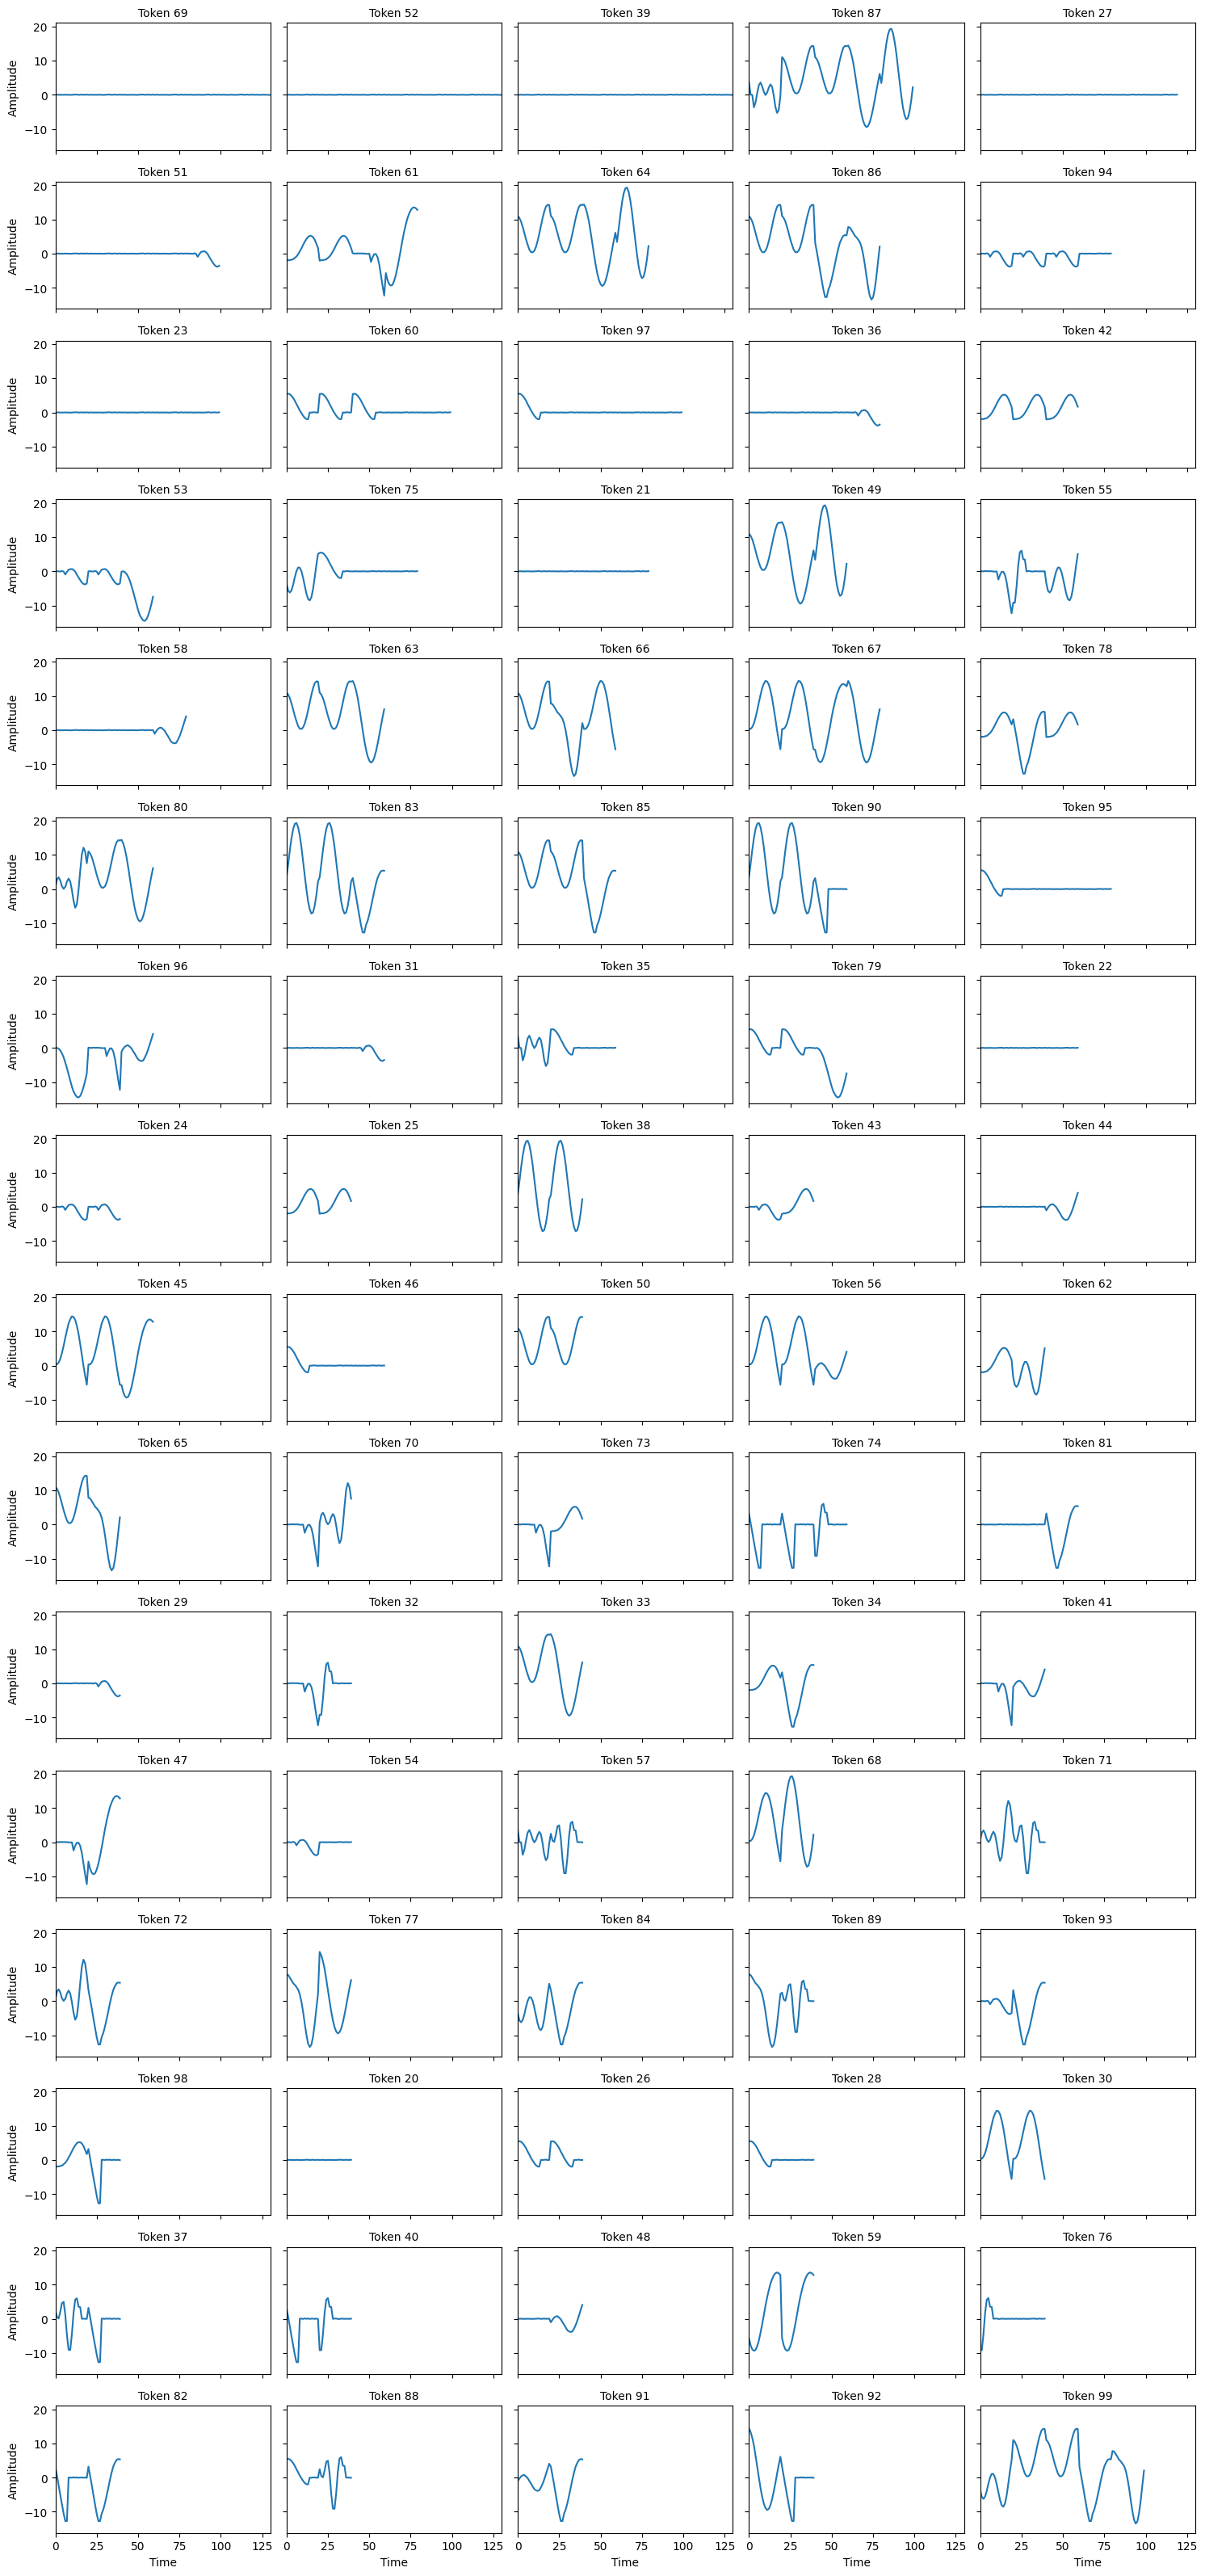

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Assuming learned_bpe_vocab, cluster_centers, and AEmodel are defined
# Number of subplots (total number of tokens)
n_plots = len(learned_bpe_vocab)

# Dynamically calculate the number of rows and columns for subplots
n_cols = 5  # Fixing 5 columns for better organization
n_rows = (n_plots + n_cols - 1) // n_cols  # Dynamically determining the number of rows

# Create figure with the calculated grid of subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 2), sharex=True, sharey=True)

# Flatten the axs array for easy iteration
axs = axs.ravel()

for i, (k, v) in enumerate(learned_bpe_vocab.items()):
    v_list = v.split(' ')
    
    # Get the cluster centers of v
    combined_sequence = np.array([])
    for token in v_list:
        token = int(token)
        cluster_center = cluster_centers[token].squeeze().detach().cpu().numpy()
        
        # Decode the cluster center
        # decoded_motif = AEmodel.decode(torch.tensor(cluster_center).unsqueeze(0).unsqueeze(-1).float().to(device))
        # decoded_motif = decoded_motif.squeeze().detach().cpu().numpy()
        decoded_motif_sub = decoded_motifs[token]
        
        combined_sequence = np.concatenate((combined_sequence, decoded_motif_sub))
    
    # Pad the combined_sequence to a fixed length (if needed)
    # combined_sequence = np.pad(combined_sequence, (0, 200 - len(combined_sequence)))

    # Plot the decoded motif sequence
    axs[i].plot(combined_sequence)
    axs[i].set_title(f"Token {k}", fontsize=10)
    axs[i].set_xlim(0, 130)
    # axs[i].set_ylim(-5, 5)  # Fixing y-axis limits for better visualization
    # axs[i].grid(True)
    
    # Optionally add labels to certain plots (first column and last row)
    if i % n_cols == 0:
        axs[i].set_ylabel("Amplitude")
    if i >= n_plots - n_cols:
        axs[i].set_xlabel("Time")

# Remove unused subplots if any
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j])

# Adjust layout for readability
plt.tight_layout()

# Show the plot
plt.show()

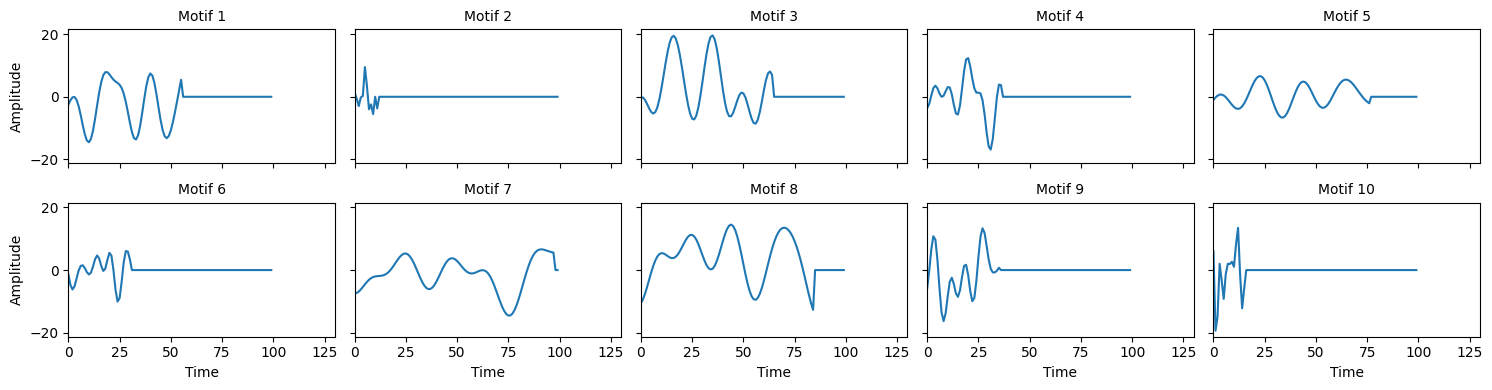

In [25]:
# import numpy as np
# import matplotlib.pyplot as plt

# Load the original motifs
original_motifs = np.load('./synthetic_signals/motifs_simple.npy')
# original_motifs = np.load('/home/jp65/Biosignals_Research/synthetic_experiments/motifs.npy')

# Define number of subplots
n_plots = len(original_motifs)
n_cols = 5  # Fixing 5 columns for better organization
n_rows = (n_plots + n_cols - 1) // n_cols  # Dynamically determining the number of rows

# Create figure with shared axes
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 2), sharex=True, sharey=True)

# Flatten the axs array for easy iteration
axs = axs.ravel()

# Plot each motif without padding
for i, motif in enumerate(original_motifs):
    
    # Plot the motif without padding
    axs[i].plot(motif)
    
    # Set title for each subplot
    axs[i].set_title(f"Motif {i + 1}", fontsize=10)
    axs[i].set_xlim(0, 130)
    
    # Optionally add labels to certain plots (first column and last row)
    if i % n_cols == 0:
        axs[i].set_ylabel("Amplitude")
    if i >= n_plots - n_cols:
        axs[i].set_xlabel("Time")

# Remove unused subplots if any
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
